<a href="https://colab.research.google.com/github/Unp12/Intern-Slab1_1/blob/main/Slab_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Load a CSV file
file_path = '/content/dim_customers.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display first few rows
print(df.head())

  customer_id age_group       city                occupation gender  \
0  ATQCUS1825       45+  Bengaluru     Salaried IT Employees   Male   
1  ATQCUS0809     25-34  Hyderabad  Salaried Other Employees   Male   
2  ATQCUS0663     25-34    Chennai  Salaried Other Employees   Male   
3  ATQCUS0452     25-34  Delhi NCR      Government Employees   Male   
4  ATQCUS3350     21-24  Bengaluru               Freelancers   Male   

  marital status  avg_income  
0        Married       73523  
1        Married       39922  
2        Married       37702  
3        Married       54090  
4         Single       28376  


In [ ]:
df.isnull().sum()

,0
customer_id,0
age_group,0
city,0
occupation,0
gender,0
marital status,0
avg_income,0


In [ ]:
df.dtypes

,0
customer_id,object
age_group,object
city,object
occupation,object
gender,object
marital status,object
avg_income,int64


In [ ]:
# Calculate the average of a avg_income column
column_name = 'avg_income'
average = df[column_name].mean()
print(f"Average of {column_name}: {average}")

Average of avg_income: 51657.03225


Text(0, 0.5, 'Count')

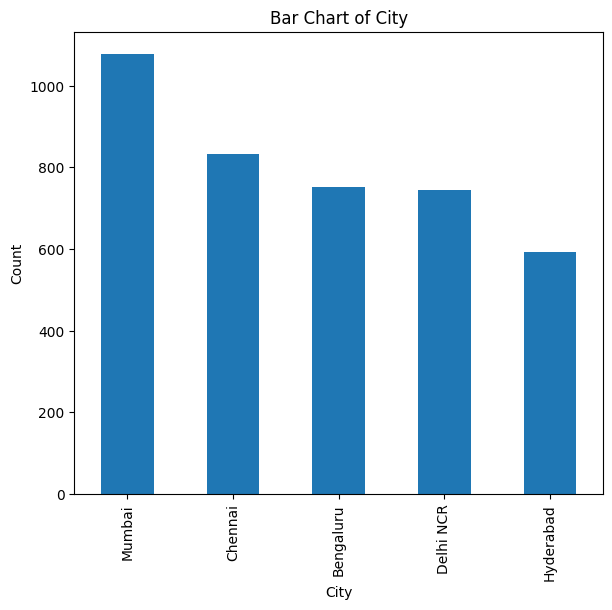

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
df['city'].value_counts().plot(kind='bar')
plt.title('Bar Chart of City')
plt.xlabel('City')
plt.ylabel('Count')

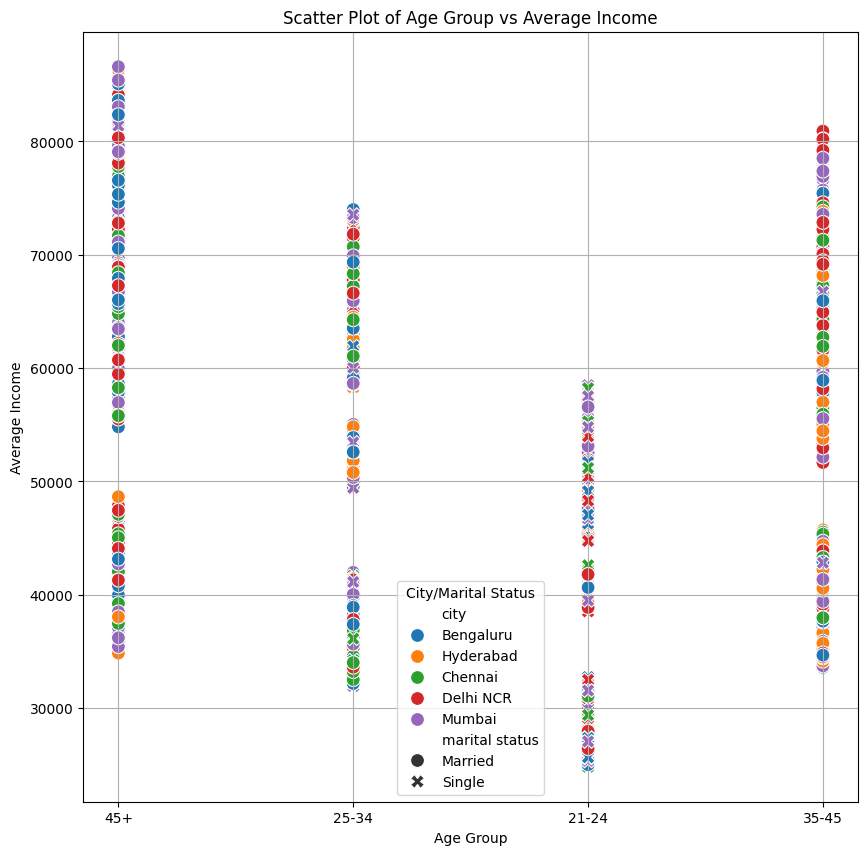

In [ ]:
# Scatter plot of age_group (categorical) vs avg_income
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x='age_group', y='avg_income', hue='city', style='marital status', s=100)
plt.title('Scatter Plot of Age Group vs Average Income')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.legend(title="City/Marital Status")
plt.grid()
plt.show()

In [ ]:
for column in df.columns:
    print(f"Value counts for column '{column}':")
    print(df[column].value_counts())
    print("-" * 40)

Value counts for column 'customer_id':
customer_id
ATQCUS1825    1
ATQCUS3582    1
ATQCUS2007    1
ATQCUS0426    1
ATQCUS3954    1
             ..
ATQCUS0366    1
ATQCUS2981    1
ATQCUS2505    1
ATQCUS0379    1
ATQCUS3477    1
Name: count, Length: 4000, dtype: int64
----------------------------------------
Value counts for column 'age_group':
age_group
25-34    1498
35-45    1273
21-24     691
45+       538
Name: count, dtype: int64
----------------------------------------
Value counts for column 'city':
city
Mumbai       1078
Chennai       834
Bengaluru     751
Delhi NCR     744
Hyderabad     593
Name: count, dtype: int64
----------------------------------------
Value counts for column 'occupation':
occupation
Salaried IT Employees       1294
Salaried Other Employees     893
Freelancers                  784
Business Owners              630
Government Employees         399
Name: count, dtype: int64
----------------------------------------
Value counts for column 'gender':
gender
Male  

In [ ]:
df.drop('customer_id',axis=1,inplace=True)

In [ ]:
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':  # Check for non-numeric (categorical) columns
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [ ]:
df.corr()

,age_group,city,occupation,gender,marital status,avg_income
age_group,1.000000,-0.049286,-0.063096,0.028034,-0.492868,0.366104
city,-0.049286,1.000000,0.009773,-0.005023,0.041931,0.019631
occupation,-0.063096,0.009773,1.000000,-0.171692,0.029057,-0.247666
gender,0.028034,-0.005023,-0.171692,1.000000,0.045891,-0.002186
marital status,-0.492868,0.041931,0.029057,0.045891,1.000000,-0.215245
avg_income,0.366104,0.019631,-0.247666,-0.002186,-0.215245,1.000000


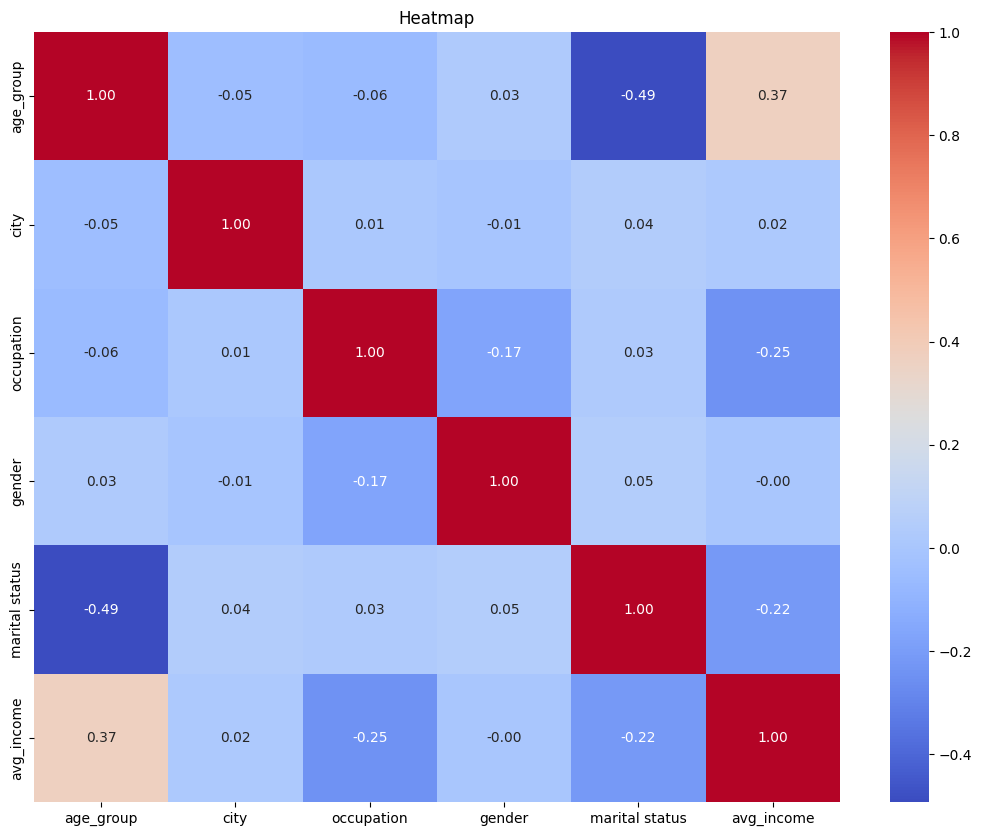

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.show()

# Insights and observations based on the analysis and visualizatio

Based on the provided code and its likely output (without actually running the code with the data file), here are some potential insights and observations:

**1. Data Overview and Quality:**

* **Missing Values:** The `df.isnull().sum()` line checks for missing values in each column.  The output will show the count of missing values per column.  If there are many missing values, particularly in important columns like `avg_income`, imputation or removal of rows/columns with missing data might be necessary.

* **Data Types:**  `df.dtypes` displays the data type of each column.  This helps identify if any columns have incorrect data types (e.g., numerical data as strings).

**2. Univariate Analysis:**

* **City Distribution:** The bar chart of city (`df['city'].value_counts().plot(kind='bar')`) visualizes the distribution of customers across different cities.  Observations might include which cities have the highest concentration of customers.

* **Value Counts of all Columns:** The loop iterating through columns and printing `value_counts()` will show the frequency of each unique value in every column. This is crucial to understand the distribution of categorical features and spot potential imbalances.

**3. Bivariate Analysis:**

* **Age Group vs. Average Income:** The scatter plot (`sns.scatterplot(...)`) shows the relationship between age group and average income, colored by city and shaped by marital status.  Key observations could include:
    * **Income Trends by Age:** Does average income increase with age? Are there any significant differences in income trends across different age groups?
    * **City-Based Income Differences:** Are there specific cities where people in certain age groups tend to have higher or lower incomes?
    * **Marital Status Influence:** Does marital status play a role in income levels for different age groups?


**4. Correlation Analysis:**

* **Correlation Matrix and Heatmap:** After label encoding the categorical features, the code calculates the correlation matrix (`df.corr()`) and visualizes it as a heatmap (`sns.heatmap(...)`). This will show the linear relationships between different variables:
    * **Strong Positive Correlations:** Identify pairs of variables that strongly move in the same direction.
    * **Strong Negative Correlations:** Identify pairs of variables that have an inverse relationship.
    * **Weak Correlations:**  Variables with low correlation might not be strongly related.

**Potential Further Analysis:**


* **Outlier Detection:**  Examine the scatter plots and distributions to identify any potential outliers in `avg_income` or other variables. Outliers might skew the results.

* **More Detailed Categorical Analysis:**  Explore the relationships between categorical variables beyond just visualization.  Consider using cross-tabulations or Chi-squared tests.

* **Multivariate Analysis:** After initial exploration, consider more complex models and analyses to uncover more detailed relationships between the variables.


**Important Considerations:**

* **Data Source:**  Understand the source of the `dim_customers.csv` file and the context of the data.
* **Business Questions:** The analysis is most effective when guided by specific questions.  What business insights are you trying to obtain?


**Example Observation (Hypothetical):**

"The scatter plot suggests that average income tends to be higher for customers in the 35-44 age group in City A, particularly those who are married.  
# This is further supported by a relatively strong positive correlation between age and income.